<table>
  <tr>
    <td> <b> Roll no.: </b> N031 </td>
    <td> <b> Name: </b> Shourya Gupta </td>
  </tr>
  <tr>
    <td> <b> Program and Division: </b> MBA Tech CE D</td>
    <td> <b> Batch: </b> B1 </td>
  </tr>   
</table>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
# Step 1: Load the wheat seed dataset
# Assuming the dataset is in a CSV file named 'wheat_seeds.csv'

# Load the dataset
data = pd.read_csv('seeds.csv')
# Step 2: Pre-processing

# a. Encoding the species names using label encoder
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])

# b. Normalize the features
X = data.drop('Type', axis=1)
y = data['Type']
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# c. Split it into train and validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Building the sequential neural network model

# a. Choose the layers
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))  # Input layer with 7 features
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes (assuming 3 species)

# b. Use appropriate activation and loss functions
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)

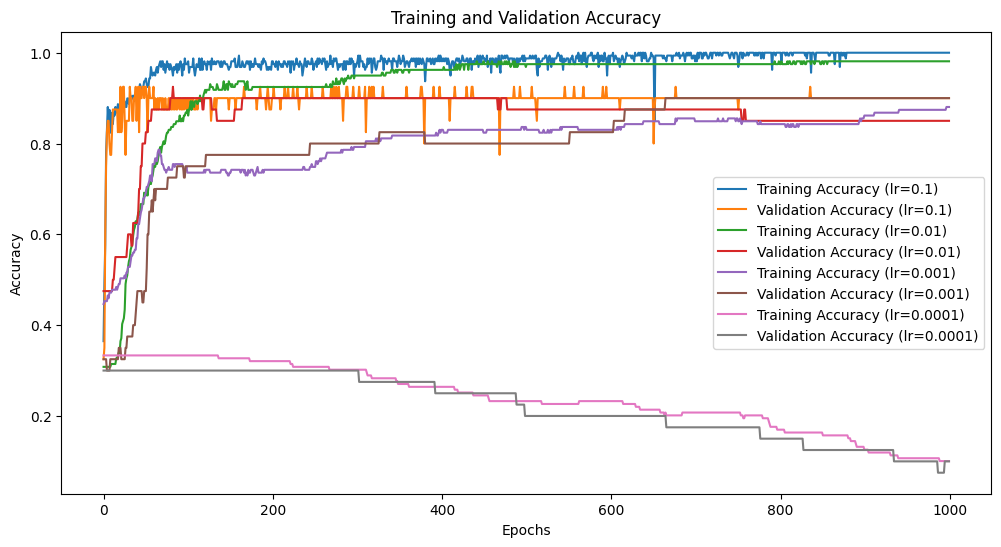

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
history_dict = {}

for lr in learning_rates:
  model = Sequential()
  model.add(Dense(12, input_dim=7, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  optimizer = SGD(learning_rate=lr)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), verbose=0)
  history_dict[lr] = history

plt.figure(figsize=(12, 6))
for lr, history in history_dict.items():
  plt.plot(history.history['accuracy'], label=f'Training Accuracy (lr={lr})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (lr={lr})')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

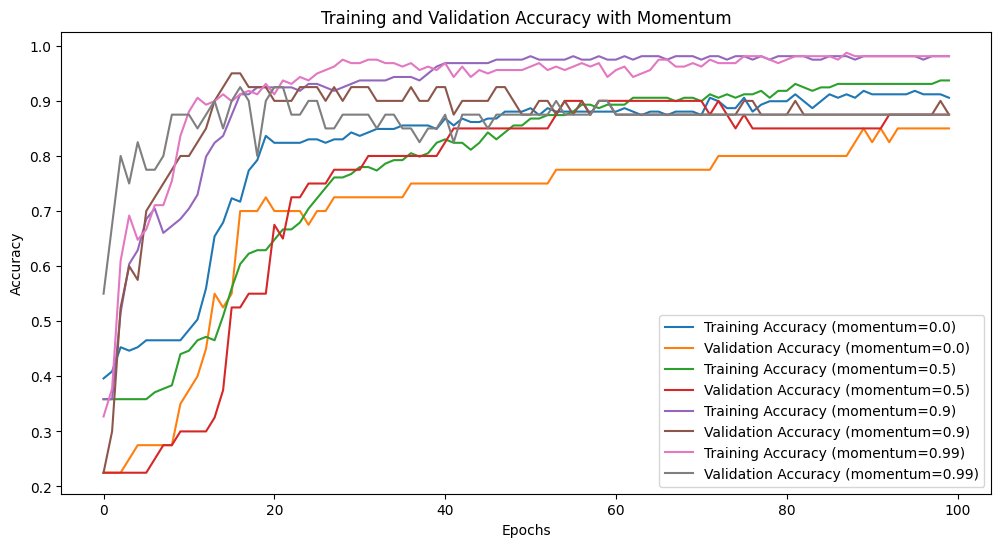

In [ ]:
momentum_values = [0.0, 0.5, 0.9, 0.99]
history_dict_momentum = {}

best_lr = 0.01

for momentum in momentum_values:
  model = Sequential()
  model.add(Dense(12, input_dim=7, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  optimizer = SGD(learning_rate=best_lr, momentum=momentum)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
  history_dict_momentum[momentum] = history

plt.figure(figsize=(12, 6))
for momentum, history in history_dict_momentum.items():
  plt.plot(history.history['accuracy'], label=f'Training Accuracy (momentum={momentum})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (momentum={momentum})')

plt.title('Training and Validation Accuracy with Momentum')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

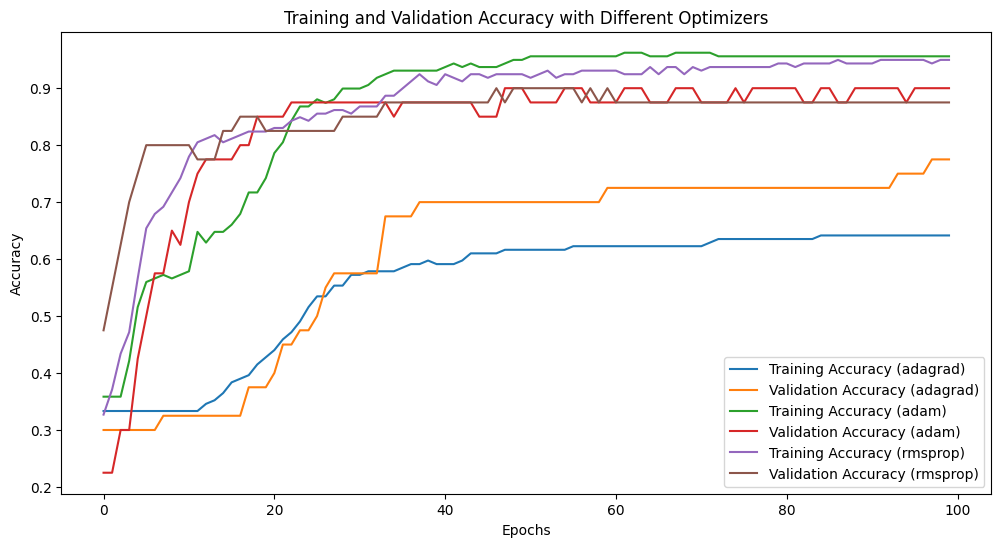

In [ ]:
optimizers = ['adagrad', 'adam', 'rmsprop']
history_dict_optimizers = {}

for optimizer_name in optimizers:
  model = Sequential()
  model.add(Dense(12, input_dim=7, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
  history_dict_optimizers[optimizer_name] = history

plt.figure(figsize=(12, 6))
for optimizer_name, history in history_dict_optimizers.items():
  plt.plot(history.history['accuracy'], label=f'Training Accuracy ({optimizer_name})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({optimizer_name})')

plt.title('Training and Validation Accuracy with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

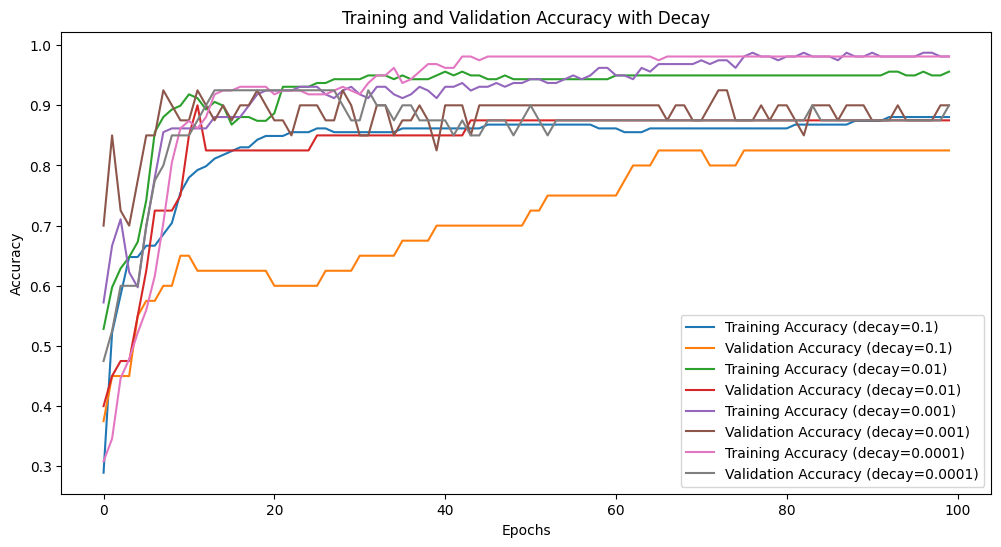

In [ ]:
import tensorflow as tf

decay_values = [1E-1, 1E-2, 1E-3, 1E-4]
history_dict_decay = {}

best_momentum = 0.9

for decay in decay_values:
  model = Sequential()
  model.add(Dense(12, input_dim=7, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(3, activation='softmax'))

  optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=best_lr, momentum=best_momentum, decay=decay)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
  history_dict_decay[decay] = history

plt.figure(figsize=(12, 6))
for decay, history in history_dict_decay.items():
  plt.plot(history.history['accuracy'], label=f'Training Accuracy (decay={decay})')
  plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy (decay={decay})')

plt.title('Training and Validation Accuracy with Decay')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Based on the plots and results, it has been observed that Adam optimizer with a learning rate of 0.01 performs best for this dataset.**

In [ ]:
def colab2pdf():
  # @title Download Notebook in PDF Format{display-mode:'form'}
  !apt-get install -yqq --no-install-recommends librsvg2-bin>/dev/null;
  import contextlib,datetime,google,io,IPython,ipywidgets,json,locale,nbformat,os,pathlib,requests,urllib,warnings,werkzeug,yaml,re;locale.setlocale(locale.LC_ALL,'en_US.UTF-8');warnings.filterwarnings('ignore',category=nbformat.validator.MissingIDFieldWarning);
  %matplotlib inline
  def convert(b):
    try:
      s.value='🔄 Converting';b.disabled=True
      n=pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f'http://{os.environ["COLAB_JUPYTER_IP"]}:{os.environ["KMP_TARGET_PORT"]}/api/sessions').json()[0]['name'])))
      p=pathlib.Path('/content/pdfs')/f'{datetime.datetime.utcnow().strftime("%Y%m%d_%H%M%S")}_{n.stem}';p.mkdir(parents=True,exist_ok=True);nb=nbformat.reads(json.dumps(google.colab._message.blocking_request('get_ipynb',timeout_sec=600)['ipynb']),as_version=4)
      u=[u for c in nb.cells if c.get('cell_type')=='markdown' for u in re.findall(r'!\[.*?\]\((https?://.*?)\)',c['source']) if requests.head(u,timeout=5).status_code!=200]
      if u:raise Exception(f"Bad Image URLs: {','.join(u)}")
      nb.cells=[cell for cell in nb.cells if '--Colab2PDF' not in cell.source]
      nb=nbformat.v4.new_notebook(cells=nb.cells or [nbformat.v4.new_code_cell('#')]);nbformat.validator.normalize(nb)
      nbformat.write(nb,(p/f'{n.stem}.ipynb').open('w',encoding='utf-8'))
      with (p/'config.yml').open('w', encoding='utf-8') as f: yaml.dump({'include-in-header':[{'text':r'\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}'}],'include-before-body':[{'text':r'\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}'}]},f)
      !quarto render {p}/{n.stem}.ipynb --metadata-file={p}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
      google.colab.files.download(str(p/f'{n.stem}.pdf'));s.value=f'✅ Downloaded: {n.stem}.pdf'
    except Exception as e:s.value=f'❌ {str(e)}'
    finally:b.disabled=False
  if not pathlib.Path('/usr/local/bin/quarto').exists():
    !wget -q 'https://quarto.org/download/latest/quarto-linux-amd64.deb' && dpkg -i quarto-linux-amd64.deb>/dev/null && quarto install tinytex --update-path --quiet && rm quarto-linux-amd64.deb
  b=ipywidgets.widgets.Button(description='⬇️ Download');s=ipywidgets.widgets.Label();b.on_click(lambda b:convert(b));IPython.display.display(ipywidgets.widgets.HBox([b,s]))
colab2pdf() # | Colab2PDF v1.6 | https://github.com/drengskapur/colab2pdf | GPL-3.0-or-later |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>